<ins>Instructions day 10</ins>: Frame at least 10 hypothesis with the problem statement

# About

## Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company — because of the following reasons:

* The former employees projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* A sizeable department has to be maintained, for the purposes of recruiting new talent
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know <ins>what changes they should make to their workplace, in order to get most of their employees to stay</ins>. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

## Goal of the case study

You are required to model the <ins>probability of attrition</ins>. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## Data

You have at your disposal the following information:

| Variable | Meaning | Levels
| :---     | :--     | :--
| Age | Age of the employee 
| Attrition | Whether the employee left in the previous year or not   
| BusinessTravel | How frequently the employees travelled for business purposes in the last year   
| Department | Department in company   
| DistanceFromHome | Distance from home in kms   
| Education | Education Level | 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
| EducationField | Field of education  
| EmployeeCount | Employee count  
| EmployeeNumber | Employee number/id  
| EnvironmentSatisfaction | Work Environment Satisfaction Level | 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
| Gender | Gender of employee  
| JobInvolvement | Job Involvement Level | 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
| JobLevel | Job level at company on a scale of 1 to 5   
| JobRole | Name of job role in company 
| JobSatisfaction | Job Satisfaction Level | 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
| MaritalStatus | Marital status of the employee  
| MonthlyIncome | Monthly income in rupees per month  
| NumCompaniesWorked | Total number of companies the employee has worked for   
| Over18 | Whether the employee is above 18 years of age or not    
| PercentSalaryHike | Percent salary hike for last year   
| PerformanceRating | Performance rating for last year | 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
| RelationshipSatisfaction | Relationship satisfaction level | 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
| StandardHours | Standard hours of work for the employee 
| StockOptionLevel | Stock option level of the employee  
| TotalWorkingYears | Total number of years the employee has worked so far    
| TrainingTimesLastYear | Number of times training was conducted for this employee last year  
| WorkLifeBalance | Work life balance level | 1 'Bad', 2 'Good', 3 'Better', 4 'Best'
| YearsAtCompany | Total number of years spent at the company by the employee  
| YearsSinceLastPromotion | Number of years since last promotion    
| YearsWithCurrManager | Number of years under current manager   

# Preparing the data

In [68]:
import pandas as pd

df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [69]:
df[:1].T

,0
Age,51
Attrition,No
BusinessTravel,Travel_Rarely
Department,Sales
DistanceFromHome,6
Education,2
EducationField,Life Sciences
EmployeeCount,1
EmployeeID,1
Gender,Female


In [70]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [71]:
df.shape

(4410, 24)

## Handle missing values

In [72]:
# Check columns with missing values
count_missing = (df.isnull().sum())
print(count_missing[count_missing > 0])

NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64


In [73]:
# Drop the rows with missing values
df = df.dropna()
df.shape

(4382, 24)

## Handle duplicates

In [75]:
print(df.duplicated().sum())
# df.drop_duplicates()

0


# Analysis

For numeric features

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.00,7.0,14.00,29.0
Education,4382.0,2.912369,1.024728,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4382.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.25,2208.5,3308.75,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.00,49190.0,83790.00,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.00,14.0,18.00,25.0
StandardHours,4382.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [160]:
dfYes = df[df['Attrition'] == 'Yes']
dfNo  = df[df['Attrition'] == 'No']

#dfSplit = dfNo.join(dfYes, lsuffix='_YES', rsuffix='_NO')
#dfSplit = dfSplit.reindex(columns=sorted(dfSplit.columns))
#dfSplit.T

(dfNo.describe().drop('count') - dfYes.describe().drop('count')).T

,mean,std,min,25%,50%,75%,max
Age,3.938670,-0.787020,0.0,3.0,4.0,4.0,2.0
DistanceFromHome,0.208413,0.416235,0.0,0.0,0.0,-1.0,0.0
Education,0.047703,0.012181,0.0,0.0,0.0,0.0,0.0
EmployeeCount,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
EmployeeID,15.990248,1.681500,-1.0,41.0,51.0,-38.0,6.0
JobLevel,0.037270,0.068114,0.0,0.0,0.0,1.0,0.0
MonthlyIncome,3869.259599,2651.971826,420.0,920.0,220.0,15020.0,1400.0
NumCompaniesWorked,-0.291138,-0.222572,0.0,0.0,1.0,-1.0,0.0
PercentSalaryHike,-0.330478,-0.148746,0.0,0.0,0.0,0.0,0.0
StandardHours,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [161]:
columns = df._get_numeric_data().columns
columns = columns.drop(['EmployeeCount', 'EmployeeID'])
print(columns)
print(columns.size)

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
14


/home/myself/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


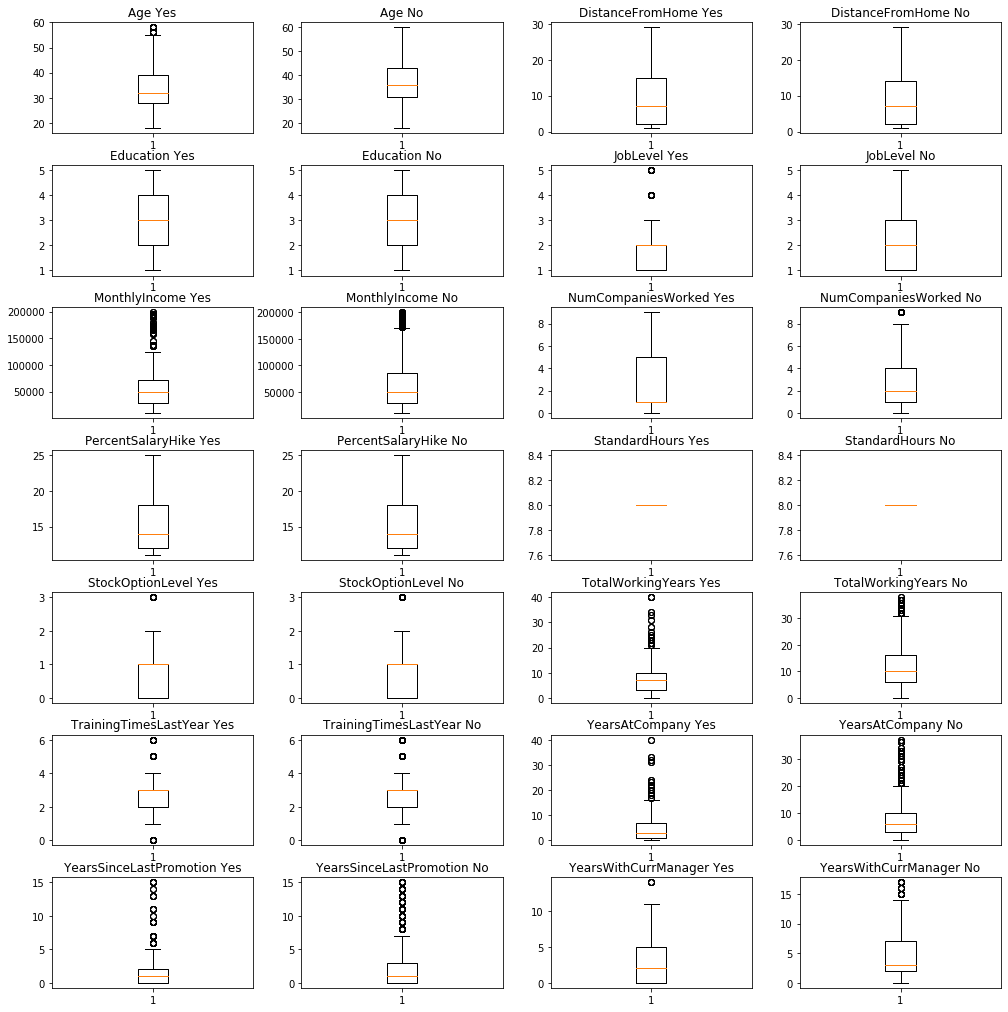

In [163]:
#Age, MonthlyIncome
import matplotlib.pyplot as plt

fig, ax = plt.subplots(7, 4, figsize=(14,14))
fig.tight_layout()
n = 0
for row in range(7):
    for col in range(0,4,2):
        column = columns[n]

        ax[row,col].boxplot(dfYes[column])
        ax[row,col].set_title(column + ' [Yes]')

        ax[row,col+1].boxplot(dfNo[column])
        ax[row,col+1].set_title(column + ' [No]')
        n += 1

fig.show()

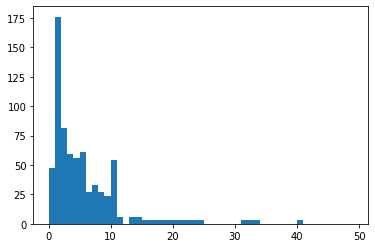

In [252]:
plt.hist(dfYes['YearsAtCompany'],bins=range(50))
plt.show()

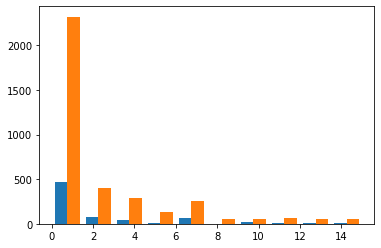

In [262]:
plt.hist([dfYes['YearsSinceLastPromotion'], dfNo['YearsSinceLastPromotion']])
plt.show()

## Hypothesis

1. People over 40 are less likely to leave (Age > 40)
2. People with an income less than 50000 are more likely to leave (MonthlyIncome < 50000)
3. People that are new to the job market are more likely to leave (TotalWorkingYears < 5)
4. People that never worked for another company before are more likely to leave (NumCompaniesWorked == 1)
5. People that have worked for the company for less than 7 years are more likely to leave (YearsAtCompany < 7)
6. People that received a promotion last year are less likely to leave (YearsSinceLastPromotion == 1)

7. The job level has no effect on attrition (JobLevel)
8. The education level has no effect on attrition (Education)
9. The number of training received has no effect on attrition (TrainingTimesLastYear)
10. The distance from home has no effect on attrition (DistanceFromHome)
